네이버 개발자센터 접속(https://developers.naver.com/)

→ Documents → 서비스API → 검색 클릭

→ API 기본정보에 있는 요청 URL 복사

→ Jupyter notebook으로 돌아가 요청 변수에 맞게 URL 수정

In [10]:
import requests as rq

In [11]:
client_id = 'udzt3jcCA8xTKi3UjGH_'
client_secret = 'HAk0g9n8cs'
headers = {
    'X-Naver-Client-Id':client_id, 
    'X-Naver-Client-Secret':client_secret
}

In [12]:
#naver open api에서 고양이, 강아지 이미지 검색
#keyword = 검색어(고양이, 강아지)
#display = 검색 결과 수
#start = 시작 인덱스

def get_api_result(keyword, display, start):
    url = 'https://openapi.naver.com/v1/search/image?query=' + keyword \
    + '&display=' + str(display) + '&start=' + str(start)
    
    result = rq.get(url, headers = headers)
    return result.json()

In [4]:
get_api_result('강아지', 100, 901)

{'lastBuildDate': 'Tue, 04 May 2021 09:29:54 +0900',
 'total': 2379236,
 'start': 901,
 'display': 100,
 'items': [{'title': '[박순석의 동물병원 24시] 성장기 강아지의 갑작스런 통증과 마비(AAI)',
   'link': 'http://imgnews.naver.net/image/088/2020/03/31/0000641341_001_20200331180011479.png',
   'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/088/2020/03/31/0000641341_001_20200331180011479.png&type=b150',
   'sizeheight': '518',
   'sizewidth': '327'},
  {'title': '강아지대통령 강아지 대통령',
   'link': 'http://img.dogpre.com/web/dogpre/reviewphoto/19/thumb/18412_detail_3030.jpg',
   'thumbnail': 'https://search.pstatic.net/sunny/?src=http://img.dogpre.com/web/dogpre/reviewphoto/19/thumb/18412_detail_3030.jpg&type=b150',
   'sizeheight': '1000',
   'sizewidth': '750'},
  {'title': '광주 서구 유촌동에서 황색 강아지 발견 보호..분홍색 체크무늬 목줄',
   'link': 'http://imgnews.naver.net/image/5511/2020/05/12/0000027486_001_20200512100204546.jpg',
   'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.

In [5]:
test = get_api_result('강아지', 100, 901)
test['items']

[{'title': '[박순석의 동물병원 24시] 성장기 강아지의 갑작스런 통증과 마비(AAI)',
  'link': 'http://imgnews.naver.net/image/088/2020/03/31/0000641341_001_20200331180011479.png',
  'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/088/2020/03/31/0000641341_001_20200331180011479.png&type=b150',
  'sizeheight': '518',
  'sizewidth': '327'},
 {'title': '강아지대통령 강아지 대통령',
  'link': 'http://img.dogpre.com/web/dogpre/reviewphoto/19/thumb/18412_detail_3030.jpg',
  'thumbnail': 'https://search.pstatic.net/sunny/?src=http://img.dogpre.com/web/dogpre/reviewphoto/19/thumb/18412_detail_3030.jpg&type=b150',
  'sizeheight': '1000',
  'sizewidth': '750'},
 {'title': '광주 서구 유촌동에서 황색 강아지 발견 보호..분홍색 체크무늬 목줄',
  'link': 'http://imgnews.naver.net/image/5511/2020/05/12/0000027486_001_20200512100204546.jpg',
  'thumbnail': 'https://search.pstatic.net/common/?src=http://imgnews.naver.net/image/5511/2020/05/12/0000027486_001_20200512100204546.jpg&type=b150',
  'sizeheight': '960',
  'sizewidth': '657'},

In [13]:
def call_and_print(keyword, total_page = 10):
    link_list = []
    
    for page in range(1, total_page + 1):
        display = 100
        start = ((page - 1) * display) + 1
        json_obj = get_api_result(keyword, display, start)
        
        for item in json_obj['items']:
            link_list.append(item['link'])
    return link_list

In [7]:
keyword1 = '고양이'
link_cat = call_and_print(keyword1)
print(link_cat)

['http://post.phinf.naver.net/MjAyMTAzMDFfMjEy/MDAxNjE0NTg1NTE2MjQx.ph9-A_xYzNKPIR9s6sejTCavNjDMeErnqzmSIE7FxBkg.TB9bMv5dPxFUZUs98q5Ne2G60TByrmH8853_yfDiplQg.JPEG/IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg', 'http://post.phinf.naver.net/MjAyMTA0MTJfNjkg/MDAxNjE4MTk4Njc3ODAy.ywlDcIB-Dqp-MuuVn_Kj_NZHcER9z9XH2iguU0pS1MUg.D2oPUunGzOklGDtlvXku87ZU_Wd8qjjjAXpC_qIzGJwg.JPEG/I5moydFuUMwFi3oEOPX959RlIZqY.jpg', 'http://post.phinf.naver.net/MjAyMTA0MTVfMTg5/MDAxNjE4NDczMTE1NTMz.BLwOzfhmqzSDxvSzFKSWkHQ4KkEENynw7zlcLXRWyC4g.OhglgZEy0zxNVk857Rc3586pcjtEJnlR9oJLVI5XEwQg.JPEG/IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg', 'http://post.phinf.naver.net/MjAyMTA0MTZfODUg/MDAxNjE4NTQyMjA4Nzcz.Fo09j1LTrzqaFs3H4fR28K8vDhWcjnkjeG0J8aPzjJgg.TR4QHBC7iwDt3JC1h8wuN6JPCqTJEKl4JaiCrits_D8g.JPEG/IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg', 'http://post.phinf.naver.net/MjAyMTA0MDVfMjE3/MDAxNjE3NTgyNzk0NjI5.uenX5C_yWoHfzagoE9_e934naoZ_lkVaspCnjMRkPukg.Hk4pZ9WSMv6UZ3sLPfN2szFmHkYcZz1l48QE2BOFl40g.JPEG/I83NJ67RXsHAWWga9wDSmnhAfE98.jpg', 'http://post.p

In [ ]:
client_id = 'udzt3jcCA8xTKi3UjGH_'
client_secret = 'HAk0g9n8cs'
headers = {
    'X-Naver-Client-Id':client_id, 
    'X-Naver-Client-Secret':client_secret
}

def get_api_result(keyword, display, start):
    url = 'https://openapi.naver.com/v1/search/image?query=' + keyword \
    + '&display=' + str(display) + '&start=' + str(start)
    
    result = rq.get(url, headers = headers)
    return result.json()

def call_and_print(keyword, total_page = 10):
    link_list = []
    
    for page in range(1, total_page + 1):
        display = 100
        start = ((page - 1) * display) + 1
        json_obj = get_api_result(keyword, display, start)
        
        for item in json_obj['items']:
            link_list.append(item['link'])
    return link_list

In [14]:
keyword2 = '강아지'
link_dog = call_and_print(keyword2)
link_dog

['http://imgnews.naver.net/image/5284/2020/11/09/0000466860_001_20201109102816824.png',
 'http://imgnews.naver.net/image/5511/2021/03/13/0000052698_001_20210313113248904.jpg',
 'http://imgnews.naver.net/image/5511/2021/02/11/0000051115_001_20210211133731882.jpg',
 'http://imgnews.naver.net/image/5511/2021/03/05/0000052228_001_20210305144831029.jpg',
 'http://post.phinf.naver.net/MjAyMTA0MDJfMjEy/MDAxNjE3Mzc0MzUyMTUw.8Dm1WIWQC_4C3_3_43pVOMNR8REjhcu3Lkq6PjinS-Ig.tXsgUXMsho_kvPG_MZKsP1NYwn1Q7BlPZoxl54EfBQYg.JPEG/IzRN-12XDSF5Ub9iXFio8a3ldf_I.jpg',
 'http://imgnews.naver.net/image/5511/2021/02/04/0000050751_001_20210204155455970.jpg',
 'http://post.phinf.naver.net/MjAyMTAyMjJfMjY2/MDAxNjEzOTg0MjIwNTgx.FVtWaV1KqJM9RvDMxMERsGVoGNDoh_6ab-QKKsgK2m0g.xGJ8imRlveaytUaoeGi66QiGB1M2Mm-_FajokoD67x8g.JPEG/IanLAiaQhMqsReGtkdQf89a9Fees.jpg',
 'http://imgnews.naver.net/image/5350/2021/04/22/0000101925_001_20210422140243723.png',
 'http://shop1.phinf.naver.net/20210417_169/1618634206276AbBSt_JPEG/thumb_2s

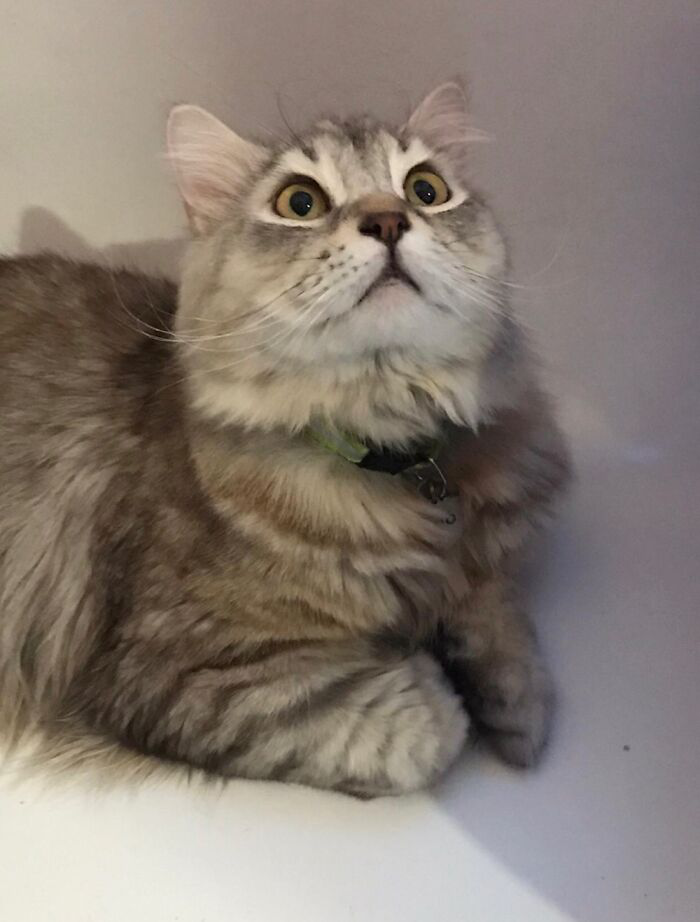

In [17]:
#이미지 잘 나오나 test
import urllib.request as rq
from PIL import Image
from io import BytesIO

url = link_cat[0]

#urlopen: url에 접속
#read: 이미지 내용 가져옴
img_file = rq.urlopen(url).read()
real_img = Image.open(BytesIO(img_file))
real_img

## image file 저장

In [19]:
from pymongo import MongoClient
from gridfs import GridFS
from bson.objectid import ObjectId
from gridfs import GridFSBucket
import urllib.request

## 테스트 코드

In [21]:
url = link_cat[0]

img_name = url.split('/')[-1]
img_type = url.split('.')[-1]
content_type = 'image/{}' .format(img_type)
img_file = rq.urlopen(url).read()

In [30]:
#image name에 ?가 있는 경우
test = 'https://g-grafolio.pstatic.net/20140915_290/1410753053523sJkWv_JPEG/\
58.%B0%ED%BE%E7%C0%CC_%BD%BA%C4%DA%C6%BC%BD%AC%BD%BA%C6%AE%B7%B9%C0%CC%C6%AE.jpg?type=w896_4'

#78th index
print(test.find('?'))

#? 없을 경우 -1 return
print(url.find('?'))

if test.find('?') != -1:
    test = test.split('/')[-1]
    print('? 포함:', test)
    test = test.split('?')[0]
    print('? 제외:', test)

148
-1
? 포함: 58.%B0%ED%BE%E7%C0%CC_%BD%BA%C4%DA%C6%BC%BD%AC%BD%BA%C6%AE%B7%B9%C0%CC%C6%AE.jpg?type=w896_4
? 제외: 58.%B0%ED%BE%E7%C0%CC_%BD%BA%C4%DA%C6%BC%BD%AC%BD%BA%C6%AE%B7%B9%C0%CC%C6%AE.jpg


In [33]:
db = MongoClient().python_test
fs = GridFS(db)
bucket = GridFSBucket(db)
img_upload = bucket.open_upload_stream(img_name, 
                                       metadata = {'contentType':content_type,
                                                   'type':'cat'
                                                  })
img_upload.write(img_file)
img_upload.close()

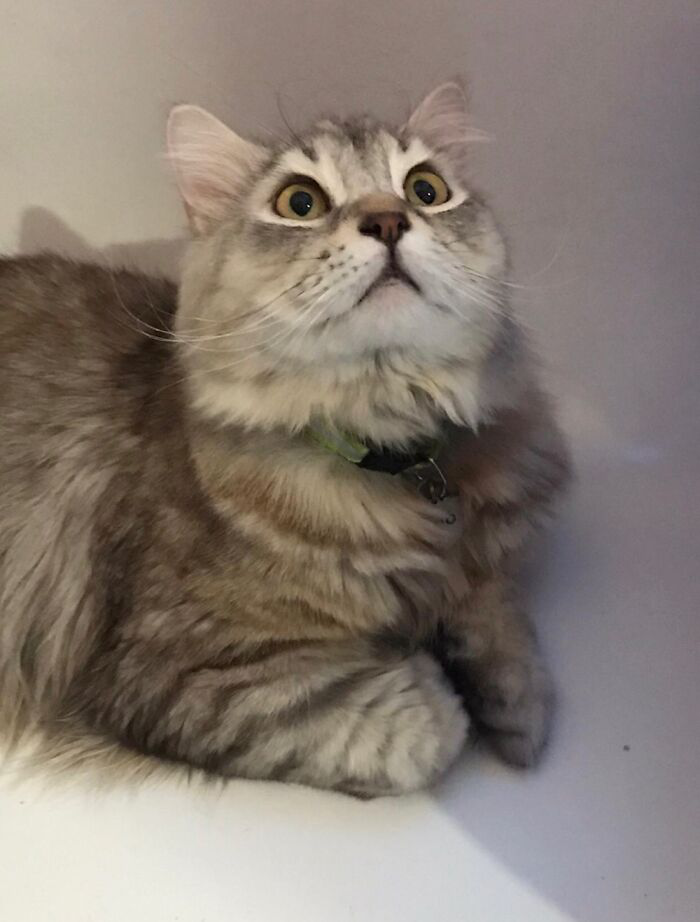

In [34]:
list(db.fs.files.find())
img_file_info = db.fs.files.find()[0]
last_file = fs.get_last_version(filename = img_file_info['filename'])
img_file = last_file.read()
real_img = Image.open(BytesIO(img_file))
real_img

## 여러개 링크 가져와서 mongodb에 저장하기(실전)

In [35]:
from pymongo import MongoClient
from gridfs import GridFS
from bson.objectid import ObjectId
from gridfs import GridFSBucket
import urllib.request as rq
from PIL import Image
from io import BytesIO

db = MongoClient().python_test
fs = GridFS(db)
bucket = GridFSBucket(db)

In [36]:
for url in link_cat:
    try:
        img_file = rq.urlopen(url).read()
        
        img_name = url.split('/')[-1]
        if img_name.find('?') != -1:
            img_name = img_name.split('?')[0]
            
        img_type = url.split('.')[-1]
        #if img_name.find('.') != -1:
        #    img_type = img_name.split('.')[-1]
        
        content_type = 'image/{}' .format(img_type)
    
        img_upload = bucket.open_upload_stream(img_name, 
                                               metadata = {'contentType':content_type,
                                                           'type':'cat'})
        img_upload.write(img_file)
        img_upload.close()
        
        print('name:', img_name, 'type:', img_type, 'content type:', content_type)
        
    except:
        print('error')

name: IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg type: jpg content type: image/jpg
name: I5moydFuUMwFi3oEOPX959RlIZqY.jpg type: jpg content type: image/jpg
name: IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg type: jpg content type: image/jpg
name: IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg type: jpg content type: image/jpg
name: I83NJ67RXsHAWWga9wDSmnhAfE98.jpg type: jpg content type: image/jpg
name: IG79sqb-FJtxWBSNtNymn1-QaJbc.jpg type: jpg content type: image/jpg
name: IpOX3MIQao76aQ5DO8uSEE3KqAvc.jpg type: jpg content type: image/jpg
name: mosaakTul0.jpeg type: jpeg content type: image/jpeg
name: IR3Ystm-qKc2kqBL3LHe-gfI_KLI.jpg type: jpg content type: image/jpg
name: IKAGAvCAUDkUL3Ed7_clw-dyRzXI.jpg type: jpg content type: image/jpg
name: 0000109645_001_20210414160328325.jpg type: jpg content type: image/jpg
name: IIUWZhhCiFuB9aBDN-KZ9lmNPQ2A.jpg type: jpg content type: image/jpg
name: Iim65cm5HWXqjZXcxmSgqhWxFTNo.jpg type: jpg content type: image/jpg
name: I-A0r1LdiJ3yO6c6ldxnBShIDofo.jpg type: jpg content type:

name: mug_obj_201403120300032819.jpg type: jpg content type: image/jpg
name: I4pKUh84Nz5YtZWrfDNTQamC5qtY.jpg type: jpg content type: image/jpg
name: DSC02684.jpg type: jpg?type=w896_4 content type: image/jpg?type=w896_4
name: mug_obj_141221917436380909.jpg type: jpg content type: image/jpg
name: 15406361523496934_2124097099.jpg type: jpg content type: image/jpg
name: d981b44c7ea5a98373d0e32b08ff6231--spring-blossom-beautiful-cats.jpg type: jpg content type: image/jpg
name: 1531627538710.jpg type: jpg content type: image/jpg
name: 491841_375193_1615_99_20151014075618.jpg type: jpg content type: image/jpg
name: 0000026155_001_20200429111451688.jpg type: jpg content type: image/jpg
name: I8iKQLczDD41onU8rWX7k9ymlkk0.jpg type: jpg content type: image/jpg
name: dafbab0648c25862c7ed31e17803eed5--you-dont-say-its-you.jpg type: jpg content type: image/jpg
name: news_1420532789_480230_m_1_99_20150106173005.jpg type: jpg content type: image/jpg
name: 20121212_1355278439..jpg_59_20121212112951.j

name: a0013657_2238319.jpg type: jpg content type: image/jpg
name: 0000035567_001_20200731130641181.jpg type: jpg content type: image/jpg
name: 0000048734_001_20201225122630355.jpg type: jpg content type: image/jpg
name: 0000001462_001_20190521113028991.jpg type: jpg content type: image/jpg
name: 0000047289_001_20201130171816690.jpg type: jpg content type: image/jpg
name: 0000047771_001_20201208160244486.jpg type: jpg content type: image/jpg
name: 15406361523496934_2124097099.jpg type: jpg content type: image/jpg
name: 0000045172_001_20201028111930596.jpg type: jpg content type: image/jpg
name: I7JzERO51VYxkbJRnN8GVilX-oeo.jpg type: jpg content type: image/jpg
name: Io-itN1_qNlXImG_BZf00vhjbgPY.jpg type: jpg content type: image/jpg
name: 121007_507177ab8c5f2_59_20121007214507.jpg type: jpg content type: image/jpg
name: I8iKQLczDD41onU8rWX7k9ymlkk0.jpg type: jpg content type: image/jpg
name: 35205_mainiamge0.jpg type: jpg content type: image/jpg
name: IC2Jj0hnu5liOT89eOuUdKZKJcwI.jpg ty

name: 0000050852_001_20210207121800065.jpg type: jpg content type: image/jpg
name: 3667765229_K3rfWSeh_1570439165_img52.JPG type: JPG content type: image/JPG
name: 0000051615_005_20210222171008085.jpg type: jpg content type: image/jpg
name: IVY_aJa5KwhipY0EJUY2IhkRjg-g.jpg type: jpg content type: image/jpg
name: 25800240738.20210130185642.jpg type: jpg content type: image/jpg
name: 14870682085949246_1762140216.jpeg type: jpeg content type: image/jpeg
name: Id8bSU-iaZOBTJs-H9VobQMXyTI0.jpg type: jpg content type: image/jpg
name: 25709195981.20210122235124.jpg type: jpg content type: image/jpg
name: mug_obj_139789174989046500.jpg type: jpg content type: image/jpg
name: dbc8ba81501a2a5c927180b62c92a925--cat-doll-cat-art.jpg type: jpg content type: image/jpg
name: Ij_m0YPr-3eMBdFHiFWF91PRFZVU.jpg type: jpg content type: image/jpg
name: ITs1Lzf74Dxtj65MS3fizxOqnTcA.jpg type: jpg content type: image/jpg
name: 0000035527_001_20200731110843520.jpg type: jpg content type: image/jpg
name: 000003

name: 0000038582_001_20200826083904528.jpg type: jpg content type: image/jpg
name: Iz62ewy5AGHWInmMREMnTeC2GKRg.jpg type: jpg content type: image/jpg
name: I1gwRhC0nTBc4E5IYG1Z4X_CxxvQ.jpg type: jpg content type: image/jpg
name: INM4SMcJsyYofR854jMEyudcKsRw.jpg type: jpg content type: image/jpg
name: 333015484f098ba76bdbd5c3f3c206b2.jpg type: jpg content type: image/jpg
name: NISI20081116_0000268013_web.jpg type: jpg content type: image/jpg
name: 0000000273_002_20170904144451764.jpg type: jpg content type: image/jpg
name: IuJQ_zoxO6hNkw6xc602kE-hD_bk.jpg type: jpg content type: image/jpg
name: 15daac1ee5687cf7596e2cb5170ae361--prettiest-cat-devon-rex-cats.jpg type: jpg content type: image/jpg
name: 20161019_1697647_99_20161019153816.jpg type: jpg content type: image/jpg
name: I84MZ0WDyVJRa_SV3S5TVSENPfWk.jpg type: jpg content type: image/jpg
name: 0000029657_001_20200602083611769.jpg type: jpg content type: image/jpg
name: nZfZFINuuKVB7rFp6ht3uHmoFjAqqZ5VrsnpSPtGW49R6V_vjjuhIVw8TQ-ARRz

name: 20397270263538192_542630215.jpg type: jpg content type: image/jpg
name: Iowlbrn6jsnwBx55gEyLyFYBAEfA.jpg type: jpg content type: image/jpg
name: 0000053001_003_20210317162643276.jpg type: jpg content type: image/jpg
name: IF7Qn34qUK3y-GSXeVvHjyUjNauE.jpg type: jpg content type: image/jpg
name: I5lZQ33gopNCTKjXoUhRFUmm6X9k.jpg type: jpg content type: image/jpg
name: 6zw7x5p_2021217175517396422.jpg type: jpg content type: image/jpg
name: 0000573598_007_20210121100056324.jpg type: jpg content type: image/jpg
name: 15371596733499757_73845592.jpg type: jpg content type: image/jpg
name: 24803251520.20201112000109.jpg type: jpg content type: image/jpg
name: 0000053598_001_20210327134914832.jpg type: jpg content type: image/jpg
name: O1CN01H6lL6Z1RPfqPVfd0W_3249262104.jpg_1200x1200.jpg type: jpg content type: image/jpg
name: I3t2Ky-1DAFALZtxoiFb194jH18s.jpg type: jpg content type: image/jpg
name: 26410854671.20210318193500.jpg type: jpg content type: image/jpg
name: 201508221050062669_im

name: 0000037580_001_20200818083850714.jpg type: jpg content type: image/jpg
name: 0002922733_001_20180615174613682.jpg type: jpg content type: image/jpg
name: viewimage.php type: php?id=2ebcc4&no=29bcc427bd8677a16fb3dab004c86b6fad513288d8b123503a5825b429a5526b7e581468c20ba4c891366232283e5315074dda44a40dd5d5610d4f573805f94dda049c8c0835b9 content type: image/php?id=2ebcc4&no=29bcc427bd8677a16fb3dab004c86b6fad513288d8b123503a5825b429a5526b7e581468c20ba4c891366232283e5315074dda44a40dd5d5610d4f573805f94dda049c8c0835b9
name: Io9nJttGrdXCjRNCdVGNqrRCA9-A.jpg type: jpg content type: image/jpg
name: IhNVNRv02Oc-ccBOAF55_7SgzuaI.jpg type: jpg content type: image/jpg
name: 0000030346_001_20200608164813028.jpg type: jpg content type: image/jpg
name: 3eb420bcb0485197f8dbf718208d6a8c--henri-kittens-playing.jpg type: jpg content type: image/jpg
name: 201502141223383110_1_99_20150214130304.jpg type: jpg content type: image/jpg
name: 915c1a7447a5b1bd8a87c3e59b8f1310--mother-daughters-mothers.jpg type:

name: IlX5UjvW3A3l1TQajCxEcFSgVU04.jpg type: jpg content type: image/jpg
name: 0000054576_001_20210414163729018.jpg type: jpg content type: image/jpg
name: Isl-1QSwFK8_h7Lz6SnsvcXO4BYA.jpg type: jpg content type: image/jpg
name: 11144060096950091_1865318633.jpg type: jpg content type: image/jpg
name: 0000168673_013_20210423134403029.jpg type: jpg content type: image/jpg
name: IB02KyGb8wc7wwhivfihOU5XzI_c.jpg type: jpg content type: image/jpg
name: mosaGL6m32.jpeg type: jpeg content type: image/jpeg
name: IGZAAxsSktv8xsYgYno9X50bbTEQ.jpg type: jpg content type: image/jpg
name: 26761533606.20210414184807.jpg type: jpg content type: image/jpg
name: IfcMtzdJMYj_dOmkElb3VW0Yb9dc.jpg type: jpg content type: image/jpg
name: IXJnQXvVm2CrI0ew_etIMRkWnfgY.jpg type: jpg content type: image/jpg
name: I2N_e-XdT8Gh0GxHAJxs1BQwTW5o.jpg type: jpg content type: image/jpg
name: 0000728631_001_20210401143947229.png type: png content type: image/png
name: IQCkZhGZsR6BH-GwLy2OpNSanzlc.jpg type: jpg content

name: 0000046861_001_20201123091547164.jpg type: jpg content type: image/jpg
name: 0000029292_001_20200528145806604.jpg type: jpg content type: image/jpg
name: IgvAw2aKcu64aOH6DSixENwZjou8.jpg type: jpg content type: image/jpg
name: 0000009646_001_20200116170618939.jpg type: jpg content type: image/jpg
name: 371157beec1fa33411d737a2b5864068--country-living-country-life.jpg type: jpg content type: image/jpg
name: 0000029717_001_20200602095014324.jpg type: jpg content type: image/jpg
name: 0000001615_004_20180306154212666.jpg type: jpg content type: image/jpg
error
error
name: IXkVMdPk5ff7Tr8qsLC1Lbp_mwgE.jpg type: jpg content type: image/jpg
name: Ix7uok9MrtKrTQ3OvlS2raQaqoeI.jpg type: jpg content type: image/jpg
name: 8fb8366d560ad3e400de6ec34fcfa89f.jpg type: jpg content type: image/jpg
name: IY9ocG8sbEWthykQQ8LONbPdeSR4.jpg type: jpg content type: image/jpg
name: 0000002232_002_20180525092254350.jpg type: jpg content type: image/jpg
name: e3ae576c9145770c463b3596e5e51f26--fat-cats-ma

name: 115692_1.jpg type: jpg content type: image/jpg
name: 50273fa3d83407bb076232957da6e734--cute-cats-funny-cats.jpg type: jpg content type: image/jpg
name: 18067712004756786_724627714.jpg type: jpg content type: image/jpg
name: I56WVumxcN5fWMsAJh0daS6UAcKo.jpg type: jpg content type: image/jpg
name: mug_obj_140007965936566153.jpg type: jpg content type: image/jpg
name: 0000039195_001_20200830112856555.jpg type: jpg content type: image/jpg
name: IC2KDgmyJippZ3iY2SftiKGoYSYA.jpg type: jpg content type: image/jpg
name: 13401898365402242_397065510.jpg type: jpg content type: image/jpg
name: 94e133b949ecc7a1e24190b0b3f0676d.jpg type: jpg content type: image/jpg
name: IndgnbQyLz2i7cKpkM9-RU2ExCv0.jpg type: jpg content type: image/jpg
name: It6Zr0o2duyEBiQBFqOLoRFqNolY.jpg type: jpg content type: image/jpg
name: 12b0f777425e101c041025c1cef19d90.jpg type: jpg content type: image/jpg
name: IoNB1TxuziqQManUCbJV5S5DMM3s.jpg type: jpg content type: image/jpg
name: 5e97e7eed07d929587ec0b888f73874

In [37]:
db = MongoClient().python_test
fs = GridFS(db)
bucket = GridFSBucket(db)

In [38]:
for url in link_dog:
    try:
        img_file = rq.urlopen(url).read()
        
        img_name = url.split('/')[-1]
        if img_name.find('?') != -1:
            img_name = img_name.split('?')[0]
            
        img_type = url.split('.')[-1]
        #if img_name.find('.') != -1:
        #    img_type = img_name.split('.')[-1]
        
        content_type = 'image/{}' .format(img_type)
    
        img_upload = bucket.open_upload_stream(img_name, 
                                               metadata = {'contentType':content_type,
                                                           'type':'dog'})
        img_upload.write(img_file)
        img_upload.close()
        
        print('name:', img_name, 'type:', img_type, 'content type:', content_type)
        
    except:
        print('error')

name: 0000466860_001_20201109102816824.png type: png content type: image/png
name: 0000052698_001_20210313113248904.jpg type: jpg content type: image/jpg
name: 0000051115_001_20210211133731882.jpg type: jpg content type: image/jpg
name: 0000052228_001_20210305144831029.jpg type: jpg content type: image/jpg
name: IzRN-12XDSF5Ub9iXFio8a3ldf_I.jpg type: jpg content type: image/jpg
name: 0000050751_001_20210204155455970.jpg type: jpg content type: image/jpg
name: IanLAiaQhMqsReGtkdQf89a9Fees.jpg type: jpg content type: image/jpg
name: 0000101925_001_20210422140243723.png type: png content type: image/png
name: thumb_2su6h8w_2021416224357257565_1.jpg type: jpg content type: image/jpg
name: IbJVE3BIcyF0uTuHeztxf2Kb1mwk.jpg type: jpg content type: image/jpg
name: 0000051029_001_20210210155315630.jpg type: jpg content type: image/jpg
name: 0000050672_001_20210202151831294.jpg type: jpg content type: image/jpg
name: 0000054461_001_20210413152428845.jpg type: jpg content type: image/jpg
name: 00

name: 0000054420_001_20210412113210449.jpg type: jpg content type: image/jpg
name: 0000038471_001_20200825102854357.jpg type: jpg content type: image/jpg
name: IikE6MWaqRbzNOo1XrqIQl_s0MzY.jpg type: jpg content type: image/jpg
name: e1fc0b4b6296af99d6e3f27d70927468--maltezer-puppies-white-puppies.jpg type: jpg content type: image/jpg
name: 0000047896_001_20201210100243432.jpg type: jpg content type: image/jpg
name: 17610845895254510_469816220.jpg type: jpg content type: image/jpg
name: 0000046729_001_20201119143928092.jpg type: jpg content type: image/jpg
name: 0000047451_001_20201202163650013.jpg type: jpg content type: image/jpg
name: 0000042982_001_20201004104720748.jpg type: jpg content type: image/jpg
name: Ia0TxFEk40vbI9kel5CmcYVLprCI.jpg type: jpg content type: image/jpg
name: 0000047811_001_20201208164359993.jpg type: jpg content type: image/jpg
name: 0000007285_001_20210309075119435.jpg type: jpg content type: image/jpg
name: 26057767258.20210219185957.jpg type: jpg content ty

name: 0000048645_001_20201223144532176.jpg type: jpg content type: image/jpg
name: Ia0TxFEk40vbI9kel5CmcYVLprCI.jpg type: jpg content type: image/jpg
name: 0000046777_001_20201120134455783.jpg type: jpg content type: image/jpg
name: 0000048184_005_20201215165526814.jpg type: jpg content type: image/jpg
name: 14381571633286_thumb.jpg type: jpg content type: image/jpg
name: 0000047476_001_20201203150315486.jpg type: jpg content type: image/jpg
name: 5c072cd2ab5684a4ca2b66bf1d55cebe--goofy-dog-chow-puppies.jpg type: jpg content type: image/jpg
name: 4626e08d5c49022a11a2c6cd3462cf30--winter-instagram.jpg type: jpg content type: image/jpg
name: 1886_detail_5355.jpg type: jpg content type: image/jpg
name: yuhdb0zy.jpg type: jpg?type=o720_mask content type: image/jpg?type=o720_mask
name: 0000046492_001_20201114113101449.jpg type: jpg content type: image/jpg
name: Ix7mKsz-FW5WZmQsQWEB20_XAnD4.jpg type: jpg content type: image/jpg
name: 0000014478_001_20200211172627331.jpg type: jpg content typ

name: 0000049649_001_20210116145144336.jpg type: jpg content type: image/jpg
name: 21046764539302603_1609913334.jpg type: jpg content type: image/jpg
name: 0000051392_001_20210217110041360.jpg type: jpg content type: image/jpg
name: 0000038842_001_20200827113858183.jpg type: jpg content type: image/jpg
name: IgGXCNg64RHwxcxaAu_kZMNEXHG4.jpg type: jpg content type: image/jpg
name: 0000040885_001_20200915111712517.jpg type: jpg content type: image/jpg
name: 0000050072_001_20210123141221107.jpg type: jpg content type: image/jpg
name: IJ3sZXLKdONhhD8XQJctbTkiieIA.jpg type: jpg content type: image/jpg
name: 0000048324_001_20201217163815044.jpg type: jpg content type: image/jpg
name: mosa5geQbk.jpeg type: jpeg content type: image/jpeg
name: 0000031885_008_20200624164826861.jpg type: jpg content type: image/jpg
name: I9XW_TsgbT_aYsjom_nRTJDFvh4k.jpg type: jpg content type: image/jpg
name: IX_3DKoRGrbz6iNLt7kE5TLurJ_M.jpg type: jpg content type: image/jpg
name: dd59c30c4bd17bae5313cc757339356f

name: 0000035914_001_20200805083444627.jpg type: jpg content type: image/jpg
name: 4f5e66b102aa7ed61ef09d2d702f0fa0.jpg type: jpg content type: image/jpg
name: IMSftIlv8CHy7OeUIiSSH7xh0rH8.jpg type: jpg content type: image/jpg
name: IF3jCE3DtAgON0zBPRc1c-I9uTiY.jpg type: jpg content type: image/jpg
name: 19101359348749496_1190796506.jpg type: jpg content type: image/jpg
name: I61i8-IxJsiCXj4ZOG5G4dRGzDmg.jpg type: jpg content type: image/jpg
name: SSI_20150312143403_V_99_20150313030944.jpg type: jpg content type: image/jpg
name: 0000039909_001_20200907080303229.jpg type: jpg content type: image/jpg
name: 0000041784_001_20200922112814739.jpg type: jpg content type: image/jpg
name: Ia6ugQumMJC8QBRWrzw089PxFFt8.jpg type: jpg content type: image/jpg
name: 0000031415_001_20200618141821946.jpg type: jpg content type: image/jpg
name: IDfkRh23VrgwwLCEuXo8RgNirHHg.jpg type: jpg content type: image/jpg
name: 0000027028_001_20200507142857594.jpg type: jpg content type: image/jpg
name: 0000026869_

name: IW2tv5rGgUUVppK8jLQ64YWrWXd4.jpg type: jpg content type: image/jpg
name: 17893352171650461_1945387517.jpg type: jpg content type: image/jpg
name: 12278690898804212_1370699926.jpg type: jpg content type: image/jpg
name: IA2H4JqjKgxSgI0BeC4E5SA7BKfM.jpg type: jpg content type: image/jpg
name: 0000029040_001_20200526133805843.jpg type: jpg content type: image/jpg
name: 0000049271_001_20210107152650295.jpg type: jpg content type: image/jpg
name: 0000034144_001_20200721100034997.jpg type: jpg content type: image/jpg
name: IXteMUXQ7xV2EUvbeG7XjYC553tc.jpg type: jpg content type: image/jpg
name: 0000051288_001_20210215112937424.jpg type: jpg content type: image/jpg
name: 0000045395_001_20201030082150816.jpg type: jpg content type: image/jpg
name: 0000044838_001_20201024121539550.jpg type: jpg content type: image/jpg
name: 0000039197_001_20200830112857872.jpg type: jpg content type: image/jpg
name: 0000027409_001_20200511101456947.jpg type: jpg content type: image/jpg
name: 0000034316_00

name: I9W475JALGf1NhHrsOYACIw5C12c.jpg type: jpg content type: image/jpg
name: 0000043024_001_20201005080029093.jpg type: jpg content type: image/jpg
name: 55590906d654b835b3e32234803ee059--pj-party-porsche.jpg type: jpg content type: image/jpg
name: 0000034928_001_20200727091842287.jpg type: jpg content type: image/jpg
name: 22882_detail_31961511284662.jpg type: jpg content type: image/jpg
name: T2BtwNXhRaXXXXXXXX_49061127.jpg_1200x1200.jpg type: jpg content type: image/jpg
name: 0000027192_001_20200508172656707.jpg type: jpg content type: image/jpg
name: 0000044573_001_20201022112428527.jpg type: jpg content type: image/jpg
name: I0rZLkCFcRz_9uHRJiW_kccPBAUw.jpg type: jpg content type: image/jpg
name: 1549505730_30119900.jpg type: jpg content type: image/jpg
name: 0000026735_001_20200504162053672.jpg type: jpg content type: image/jpg
name: 32873_detail_34131493021128.jpg type: jpg content type: image/jpg
name: 0000012016_001_20200130121424479.jpg type: jpg content type: image/jpg
nam

name: 0000050636_001_20210202150243185.jpg type: jpg content type: image/jpg
name: 12344896362119848_809887896.jpg type: jpg content type: image/jpg
name: 0000031873_001_20200623143422853.jpg type: jpg content type: image/jpg
name: 19695440759625072_1731348295.jpg type: jpg content type: image/jpg
name: 0000045736_001_20201103113700962.jpg type: jpg content type: image/jpg
name: 0000045440_001_20201030104458613.jpg type: jpg content type: image/jpg
name: O1CN01ayx5C21Xr3BpI22TW_1950802976.jpg_1200x1200.jpg type: jpg content type: image/jpg
name: 12111994422516463_119701571.png type: png content type: image/png
name: 0000029109_001_20200526164808584.jpg type: jpg content type: image/jpg
name: IPfIyVHejON4jA7VCFt3lEuURhII.jpg type: jpg content type: image/jpg
name: 87aea6441280e73beb65f057787042ff--toy-yorkie-teacup-yorkie.jpg type: jpg content type: image/jpg
name: 0000051243_001_20210215081731862.jpg type: jpg content type: image/jpg
name: 0000038519_001_20200825114055090.jpg type: jpg

name: 16372_detail_7901.jpg type: jpg content type: image/jpg
name: IYhwrWLsaOnWyUYOdpX23lOqVkVc.jpg type: jpg content type: image/jpg
name: I92wUBBjK2VSfOhQifOjPrs1wVvk.jpg type: jpg content type: image/jpg
name: 10020_detail_24921535014358.jpg type: jpg content type: image/jpg
name: 0000038726_001_20200827080254166.jpg type: jpg content type: image/jpg
name: 17804e21ea90c94d0ca54a3d10eb2974--flat-coat-retriever-flat-coated-retriever-puppy.jpg type: jpg content type: image/jpg
name: IT3GowSA-CUwHmy-JEI6xIaLylL4.jpg type: jpg content type: image/jpg
name: 325_detail_6540.jpg type: jpg content type: image/jpg
name: 34004_detail_57261488899578.jpg type: jpg content type: image/jpg
name: b1b66c575068d235ce7b7a3cb05eb8f9--happy-puppy-happy-dogs.jpg type: jpg content type: image/jpg
name: 0000039793_001_20200906115712934.jpg type: jpg content type: image/jpg
name: 15402_detail_7794.jpg type: jpg content type: image/jpg
name: 1a3f102888f14946c6f66d936a9eaf29--pug-love-pugs.jpg type: jpg cont

name: 0000050008_001_20210122151939857.jpg type: jpg content type: image/jpg
name: IrjhWjPkbXUMtPXNRDz5CJgx25eE.jpg type: jpg content type: image/jpg
name: 0000046707_001_20201119132526251.jpg type: jpg content type: image/jpg
name: 0002634139_001_20170327140512516.jpg type: jpg content type: image/jpg
name: 25307_detail_4928.jpg type: jpg content type: image/jpg
name: af58e4d32efd45eecfcd20162d49d804--golden-retriever-puppies-golden-retrievers.jpg type: jpg content type: image/jpg
name: I7xu1-SUbgo8MSxVyDn8REhGkmgE.jpg type: jpg content type: image/jpg
name: 3cf2ad5a43c963bb059d007d7151c35e--tiny-puppies-adorable-puppies.jpg type: jpg content type: image/jpg
name: IPJmlzi36SwByb_a7fOsEs0RyYh4.jpg type: jpg content type: image/jpg
name: Ir1vQTv5kgGdvny84kyDIsPqGr9c.jpg type: jpg content type: image/jpg
name: 10483_detail_98441486425994.jpg type: jpg content type: image/jpg
name: I-4o1pgl4bdIw2fR4hUwHw6zLPDM.jpg type: jpg content type: image/jpg
name: IsAWKaDFJDqtpoY-q_f02f4lyiBw.jpg ty

In [47]:
db = MongoClient().python_test
fs = GridFS(db)

len(list(db.fs.files.find()))

1977

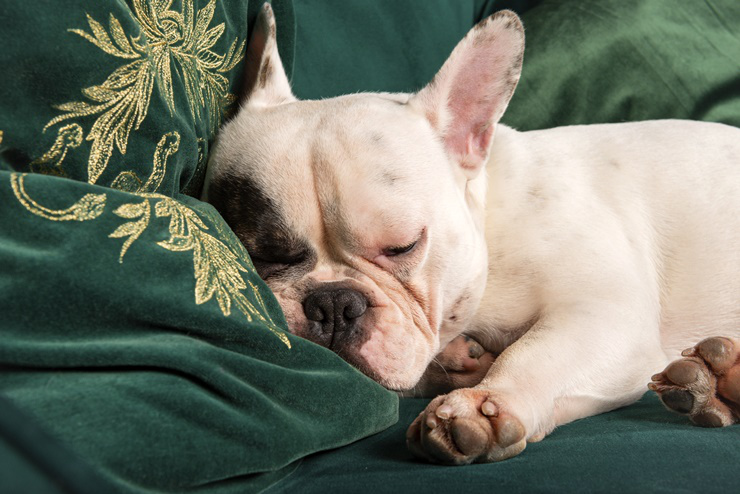

In [50]:
#mongodb에 저장된 이미지파일 불러오기 연습
img_file_info = db.fs.files.find()[1975]
last_file = fs.get_last_version(filename = img_file_info['filename'])
img_file = last_file.read()
real_img = Image.open(BytesIO(img_file))
real_img

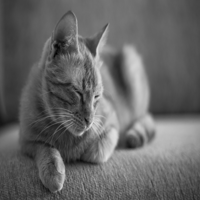

array([[71, 67, 64, ..., 70, 70, 70],
       [71, 67, 64, ..., 71, 71, 71],
       [72, 67, 64, ..., 71, 71, 70],
       ...,
       [61, 72, 76, ..., 52, 48, 54],
       [63, 60, 69, ..., 48, 58, 54],
       [70, 62, 64, ..., 51, 51, 56]], dtype=uint8)

In [60]:
#test

import numpy as np
db = MongoClient().python_test
fs = GridFS(db)

img_info = db.fs.files.find()[3]
f = fs.get_last_version(filename = img_info['filename'])
data = f.read()
#data

im = Image.open(BytesIO(data)).convert('L').resize((200, 200))
display(im)
np.array(im)

In [66]:
#200 X 200 matrix 확인
print(np.array(im).shape)

#1d-array로 변환(svm 활용하기 위함)
print(np.array(im).flatten())
print(np.array(im).flatten().shape)

#정수를 0과 1사이의 float으로 변환
print(np.array(im).flatten() / 255)

(200, 200)
[71 67 64 ... 51 51 56]
(40000,)
[0.27843137 0.2627451  0.25098039 ... 0.2        0.2        0.21960784]


In [67]:
import numpy as np

db = MongoClient().python_test
fs = GridFS(db)

images_in_db = list(db.fs.files.find())

images = []
labels = []

for file_info in images_in_db:
    file_name = file_info['filename']
    print('파일명:', file_name)
    
    last_ver = fs.get_last_version(filename = file_name)
    data = last_ver.read()
    
    if len(data) > 0:
        re_img = Image.open(BytesIO(data)).convert('L').resize((200, 200))
        
        re_img = (np.array(re_img).flatten() / 255.0).astype('float32')
        images.append(re_img)
        
        label = 1 if 'cat' in file_info['metadata']['type'] else 0
        labels.append(label)

파일명: IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg
파일명: IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg
파일명: I5moydFuUMwFi3oEOPX959RlIZqY.jpg
파일명: IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg
파일명: IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg
파일명: I83NJ67RXsHAWWga9wDSmnhAfE98.jpg
파일명: IG79sqb-FJtxWBSNtNymn1-QaJbc.jpg
파일명: IpOX3MIQao76aQ5DO8uSEE3KqAvc.jpg
파일명: mosaakTul0.jpeg
파일명: IR3Ystm-qKc2kqBL3LHe-gfI_KLI.jpg
파일명: IKAGAvCAUDkUL3Ed7_clw-dyRzXI.jpg
파일명: 0000109645_001_20210414160328325.jpg
파일명: IIUWZhhCiFuB9aBDN-KZ9lmNPQ2A.jpg
파일명: Iim65cm5HWXqjZXcxmSgqhWxFTNo.jpg
파일명: I-A0r1LdiJ3yO6c6ldxnBShIDofo.jpg
파일명: I1hoQJPcjdBUwaPKW-Mo7DKRTWKQ.jpg
파일명: 0000050851_001_20210207121759617.jpg
파일명: InMPojw89TUVzGSOxu-cLdP4z9YE.jpg
파일명: It2EXojHG65IVMKt3AUYXXvI8aCk.jpg
파일명: IsCLLxO4nAmF8PZYz7qG1SDs5k6k.jpg
파일명: I3zHrwehDjdZoKPssXEZcB82vo8Y.jpg
파일명: IBjDo1mQMyU7UqQTWiTuA9O_1ZBw.jpg
파일명: INH-dd7aSQJ8LMOJUSoLxN-cd30I.jpg
파일명: 0000100240_001_20210306160159601.png
파일명: thumb_9bi8m4p_20201230205826271445_3.jpg
파일명: Irp2bldVrTyexTc7fwpBgKFzDy4A.jpg
파일명: Iujj

C:\Users\Admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


파일명: 5a8fa361a54930af8a765b2679c88b9c.jpg
파일명: 609714_image_1_20210112170035640.jpg
파일명: IGLsMME2tKiXe4D5vNZlfxDJPTHM.jpg
파일명: IP4sawHDuGc-N7KIetB0qoQOm9vM.jpg
파일명: Iqg1oclNNDLAXoksLZBxx3-DejKk.jpg
파일명: 57edb31e5872cce7c81cf901e4ade89a--cute-cats-adorable-animals.jpg
파일명: I3nNx68qbA621Sy6Hv9KvnEkl-Xg.jpg
파일명: I-7WLTcToNOuRlJKj7eBJEe5ol-c.jpg
파일명: I3mkNPmGK5Q8-Ej0t3tStYpynm8Q.jpg
파일명: 10700860015938139_1604904605.jpg
파일명: IUyEcUi9jYsSvAFbQpmseFdMatrU.jpg
파일명: 0000052909_004_20210316163002543.jpg
파일명: IBvse4A08VxJXZn71hImUA6EFMyg.jpg
파일명: 0000041887_001_20200923084942888.jpg
파일명: 20461861653657302_2040364378.jpg
파일명: 15239924701988596_1945492768.jpg
파일명: 26529571884.20210326180434.jpg
파일명: 14191204345868055_1638250179.jpg
파일명: 4pg0m7s_202111694147318283.jpg
파일명: 25695172580.20210121221531.jpg
파일명: 131a55470e6c6ac47d92da0241ed34d2.JPG
파일명: IlbLDO44hHoq-8sN9xv3aBRIek5I.jpg
파일명: TB17uenmCR26e4jSZFEq6zwuXXa.jpg
파일명: 722acc910690541eeef2f9b608a1b85c--grunge-indie.jpg
파일명: 20017656010757934_95

파일명: 0000098590_001_20210120160713974.jpg
파일명: 0002300448_002_20210128094818841.JPG
파일명: IP7Vbkq6i3TnxsPMwDwh6OQUhrwo.jpg
파일명: I8FRkwyRiiVBi2V4zWO-vnYsCSWk.jpg
파일명: 16956475642754647_1035612420.jpg
파일명: 20121212_1355278451..jpg_59_20121212112951.jpg
파일명: IHgJ2421xFcKjZJ5ZAaZAnPrEnfU.jpg
파일명: O1CN01Sqr2cL1wRHIZX5yq5_769566304.jpg
파일명: IKiZ4I1hXmekR7m8yX3rCaOoZ2JA.jpg
파일명: 3b027233b22678d4c5231498b37ec075f4065fcc_27.jpg
파일명: 0000053329_003_20210324162804681.jpg
파일명: 1aadc8ea543af6c780b73aa432155b9e.jpg
파일명: 36204112562211534_192668628.jpg
파일명: IRvrlYpjKAdYCpzJG_APUmdf4glo.jpg
파일명: Iff2wJfcD-P43jvBeSmNqs-8tXWY.jpg
파일명: 26338800686.20210312195612.jpg
파일명: Ii_wfLZ2b85jDaTm6MSwGQPJuYNs.jpg
파일명: 201508221050062669_img_9_99_20150822105303.jpg
파일명: 26224980382.20210303193043.jpg
파일명: mug_obj_141024737195334286.jpg
파일명: 0000050690_004_20210203165427443.jpg
파일명: I_PSNTgnSJmY-nFCkdKoacbEu4Is.jpg
파일명: I6lIUfzjYqtKErdpIRW67khw5qsE.jpg
파일명: 0000109911_001_20210417160429263.jpg
파일명: ITEteugsJXihyGHhK7

파일명: 20130123023228_0_59_20130123211528.jpg
파일명: IijKJMKld8Nil2pV-CjilJKTftGc.jpg
파일명: 0000003725_010_20181126180823444.jpg
파일명: IFeJBVzTrteN3mujbN3ZBzgtlnxQ.jpg
파일명: 0000003571_009_20181108230408625.jpg
파일명: 0000000123_005_20170821095219652.jpg
파일명: f7b308d3305a88fb891240f90acc48cf.jpg
파일명: 20100628_1277718267_70926500_2.jpg
파일명: 401630628_bPgUDHZm_KakaoTalk_20190102_163835268.jpg
파일명: Ikv-nct5GniS1wpDzq441lZIeQu4.jpg
파일명: 0000000806_004_20180827111006990.jpg
파일명: 0000021175_001_20200321132237798.jpg
파일명: 0000001132_006_20190107113749253.jpg
파일명: 0000001462_002_20180209172400526.jpg
파일명: 0000011044_001_20200125141025288.jpg
파일명: 20160602002345_0_99_20160602162107.jpg
파일명: 0000107710_001_20210329160235961.jpg
파일명: 4069f25a3c814eda9ef77848de7f0eec.jpg
파일명: INm47lK74YIFUPkQ0CkhsF7-uyUo.jpg
파일명: h3ekPDZWaf_rjQXahKfUKz3t.jpeg.jpg
파일명: 25099973544.20201204205926.jpg
파일명: mosaJBVJu2.jpeg
파일명: IIGQlXCbnltLpfKlZrWdeFhdA9uQ.jpg
파일명: 31983288863648917_376557109.jpg
파일명: 20210215134154_1581813_12

파일명: IN268JnTfQGDr_AVBlqH-48zHzDs.jpg
파일명: thumb_9mj5y8s_2020123145820210534_3.jpg
파일명: 9da9f9aa4e2d949b2bd616db02efacc8--sleepy-animals-cat-cat.jpg
파일명: 11845.jpg
파일명: 6ha4o3d_2021216171218836177.jpg
파일명: 9c80ace3556d0351ed22b0c976a591d2--cat-cat-kitty-cats.jpg
파일명: 0000002299_006_20180601173407789.jpg
파일명: 0000011364_004_20200103143212261.jpg
파일명: 0000767238_001_20210204140255304.png
파일명: 0000046596_001_20201116110840272.jpg
파일명: 20160918181649201804_99_20160918182305.jpg
파일명: 45c6e9ec0921d5c6f241be8d6b1b63fb--outdoor-cats-exotic-cats.jpg
파일명: IFQue9ls7qy-2w4GzZBFe6v1HDWE.jpg
파일명: cab9df251bcdd6427e6ed4af3aec2a2c.jpg
파일명: 264e3248638d529066b487ae28c95404--funniest-pictures-the-funniest.jpg
파일명: SSI_20170213182315_V_99_20170213184105.jpg
파일명: WQKh3dQ.jpg
파일명: hu_1438429258_6875274405.jpeg
파일명: mug_obj_141342502975076985.jpg
파일명: 14511256987667_thumb.jpg
파일명: 01d3d6938d39fa32595d44891ba36749.jpg
파일명: 0002524266_001_20201215140603093.jpg
파일명: 0000046621_002_20201118090539195.jpg
파일명: 00

파일명: 332feeb018fdbdfa5408673edc12097c.jpg
파일명: 3e91a0727b1336f36045e1238eaf2431.jpeg
파일명: I3StM3eHhXMo4L4rlWwLF6-PP4fI.jpg
파일명: 32f900dbb3b53192d01f3aecc8678883--baby-chickens-pet-cats.jpg
파일명: IRlatA0gOW0THLL3ge6IkOP1TeXY.jpg
파일명: mug_obj_141536307885378955.jpg
파일명: IDgRMg82BvCEH8eaptWqApHXEvyg.jpg
파일명: 29126849529207683_1223861443.jpg
파일명: 0000016904_001_20200225105427604.jpg
파일명: 1493340733660.jpg
파일명: I7jc5bP7TPQpTr5w5QG75IXdv_kA.jpg
파일명: IFiNiYoZBXAr8nCx3uwlivCvTntE.jpg
파일명: I95sOa2tSuZEoR4_kSZcB7nH_9dw.jpg
파일명: 68a0cc6e86135e04b26bf46fedf0df06.jpg
파일명: 0000002845_003_20180810170551350.jpg
파일명: IE5r2E2sJVbccMtyDg2mJJsHLzDw.jpg
파일명: 0000027324_001_20200509150055836.jpg
파일명: BQQ5cf3ae8d10a4d.jpg
파일명: 0000043165_001_20201006085612052.jpg
파일명: 8ge1j7f_202091214118493298.jpg
파일명: 0000014687_008_20200212152627521.png
파일명: 5bef710b7bb244889374eddc8cb57f31.jpg
파일명: IfeeWUiGkCW8E5rF-IXgDik7AoiE.jpg
파일명: 011ad95e6f025a2e0276870bc8423d0b_20160925221619_btssvree.jpg
파일명: 0005059368_002_202012

파일명: 0000049332_001_20210109132421013.jpg
파일명: 0000053741_003_20210331103634676.jpg
파일명: 0000030587_001_20200610160415802.jpg
파일명: 0000048645_001_20201223144532176.jpg
파일명: 0000046406_001_20201112155826655.jpg
파일명: 25899788997.20210206203951.jpg
파일명: 10235_2561868_8387957.jpg
파일명: 0000043390_001_20201008085327844.jpg
파일명: 0000054420_001_20210412113210449.jpg
파일명: 0000038471_001_20200825102854357.jpg
파일명: IikE6MWaqRbzNOo1XrqIQl_s0MzY.jpg
파일명: e1fc0b4b6296af99d6e3f27d70927468--maltezer-puppies-white-puppies.jpg
파일명: 0000047896_001_20201210100243432.jpg
파일명: 17610845895254510_469816220.jpg
파일명: 0000046729_001_20201119143928092.jpg
파일명: 0000047451_001_20201202163650013.jpg
파일명: 0000042982_001_20201004104720748.jpg
파일명: Ia0TxFEk40vbI9kel5CmcYVLprCI.jpg
파일명: 0000047811_001_20201208164359993.jpg
파일명: 0000007285_001_20210309075119435.jpg
파일명: 26057767258.20210219185957.jpg
파일명: 0000048838_001_20201228140009543.jpg
파일명: 2_resize.jpg
파일명: f04980630b7aa10cfd424661f20c98ac--dog-care-tips-animal-in

파일명: 0000028423_001_20200518172404676.jpg
파일명: IVkV0tlqkyNUhneaMSDub3h0Pik0.jpg
파일명: I6bhJ2xefC1mn7dtT52iT5R2DKHI.jpg
파일명: 0000055002_001_20210421144111766.jpg
파일명: 26109925010.20210223215320.jpg
파일명: 14801995488443883_1806946075.jpg
파일명: 0000047450_001_20201202163334845.jpg
파일명: 0000049700_001_20210117141700999.jpg
파일명: 0000050207_001_20210126131542361.jpg
파일명: IOQ_ZwbbckJSI1V7Gr0DmWEBzWBs.jpg
파일명: 0000048377_001_20201218144555277.jpg
파일명: IHjlmCJpePFwqPwF5ETPG2guAIV8.jpg
파일명: 0000051246_001_20210215081736536.jpg
파일명: 0000049953_001_20210121125443038.jpg
파일명: 0000046833_001_20201120160617105.jpg
파일명: 21009437314229357_1147398700.jpeg
파일명: 0000052749_001_20210314121251284.jpg
파일명: 0000049851_001_20210120142030715.jpg
파일명: 0000053663_001_20210328114040272.jpg
파일명: 20536232625610864_1550026135.jpg
파일명: 0000050652_001_20210202151037632.jpg
파일명: 0000055321_001_20210427155803378.jpg
파일명: 96020d6ba232f00976ae60f0ac8683ab--american-bullies-photo-credit.jpg
파일명: 0000055080_001_2021042215492257

파일명: IRUFzTzq0_93IMJzf38ZkkUwlPeM.jpg
파일명: 13068697996134341_1785376466.jpg
파일명: 0000054320_001_20210410122812768.jpg
파일명: 7ed19a8ee445384ef88956663bc36e2c--springer-spaniel-puppies-spaniel-dog.jpg
파일명: IQGhE_K9hcDsMElxbs_OcdlpU8-s.jpg
파일명: 0000053218_001_20210322140120940.jpg
파일명: 0000051723_001_20210226141953920.jpg
파일명: 0000051566_001_20210221112859185.jpg
파일명: 16324242685069083_835587459.jpg
파일명: 0000054943_001_20210420161817607.jpg
파일명: I7srodbrZ47QVDWJJh97IQPD0vGg.jpg
파일명: 0000051092_001_20210211122018590.jpg
파일명: 0000052973_001_20210317151248549.jpg
파일명: 0000052123_001_20210304154247584.jpg
파일명: 0000050744_001_20210204155058518.jpg
파일명: fae011d0265ed7f52dcf5f2d5f7b151b--doberman-love-doberman-pinscher.jpg
파일명: 18251723448175130_1779688230.jpg
파일명: 0000045773_001_20201103142445453.jpg
파일명: 0000101985_001_20210425120212945.jpg
파일명: IyZttaDS1KdN1iV8YKLZS8Y4YRvo.jpg
파일명: 18407700384019787_1759519630.jpg
파일명: 0000051044_001_20210210155725475.jpg
파일명: 0000049750_006_20210118155605602.

파일명: Irqx5NLLEiytoFMd_zDhvvhFWo8g.jpg
파일명: If85CiIeF5GYoomaALwgdtq6zI2o.jpg
파일명: 20SUMMERcombi12.jpg
파일명: I3wAt22DW31l9yo6a-sf5xfCLlvA.jpg
파일명: IXzxRBx8hONXiUyIecBH6FjhMslY.jpg
파일명: 0000048487_001_20201220122401492.jpg
파일명: Il6Y8QHikHJTRZm0f_JE1BMGFQAk.jpg
파일명: a88f6db8aec21f850dc10d4042fafb83--corgi-welsh-corgi-puppies.jpg
파일명: 47f9630ac8ed750ac8a4d6d26b10ecfc.jpg
파일명: 9159480872890307_637418189.jpeg
파일명: 0000717855_001_20210207112804025.jpg
파일명: oUPepCQ8-GBJDlD6LyUo2rE9.jpg
파일명: 0000029857_001_20200603134215082.jpg
파일명: 20200702161006_1480023_600_650_20200702180102635.jpg
파일명: 42296_detail_58751492145609.jpg
파일명: 45326_detail_12331544440874.jpg
파일명: IgFiJVI4FXFGHKxS2FDWGm07_BOo.jpg
파일명: 0000042098_001_20200924113919255.jpg
파일명: IpvHNlliujTSXLVKA0Nrj6bkOifw.jpg
파일명: 0000017865_001_20200229145430523.jpg
파일명: 11913_mainiamge2.jpg
파일명: 0000043753_001_20201013145945910.jpg
파일명: 380d8a2f383f13d41b68710e2410ef82.jpg
파일명: 0000016227_011_20190617184231033.jpg
파일명: 0000039771_001_2020090513225

파일명: 25306_detail_3358.jpeg
파일명: 0000125275_001_20190129035716827.jpg
파일명: 0000031177_001_20200616100617761.jpg
파일명: 12202_detail_82621488168545.jpg
파일명: 5e74a944e256c78b98b3bf53ef94092c--sharpei-dog-shar-pei-puppies.jpg
파일명: 6111_detail_2176.jpg
파일명: IPrzCWGBVoKbuHuIZKsh-_wscT9c.jpg
파일명: IW50omLN-tJ-zyL9X0Ro2GmWKZp0.jpg
파일명: IH5IR5FhMqb1YxAvWWDFCQeuYGvY.jpg
파일명: 1aeb39e91e637c523391bc3a0bac2898.jpg
파일명: Ix0jhrlHvSH04D9iI4zZcw870N4s.jpg
파일명: 43955_detail_07871567819041.jpg
파일명: IDuTKghQPodJr73ZSB4gzzakav-E.jpg
파일명: 882e96959698759fb00d5a17a0fee586--funny-labs-lab-rescue.jpg
파일명: 41059_detail_8013.jpg
파일명: 0000052818_001_20210316135009089.jpg
파일명: IvkPfES_4j0kOlHaHyG5dLs9Rpj4.jpg
파일명: IHKAqgGbvJH7putee6OMbhVx989c.jpg
파일명: 0000032756_001_20200705120828807.jpg
파일명: 9215771527513336_278821440.jpg
파일명: I02nGU4bgzolHXO8zZA7YjMia90g.jpg
파일명: 16818_detail_61601515066823.jpeg
파일명: 10635_detail_6913.jpg
파일명: 0000043476_001_20201009122853922.jpg
파일명: 0000027709_001_20200513110804384.jpg
파일명: IwP0

In [68]:
img_array = np.array(images)
labels_array = np.array(labels)

In [69]:
img_array

array([[0.7137255 , 0.7176471 , 0.7137255 , ..., 0.5686275 , 0.5647059 ,
        0.56078434],
       [0.7137255 , 0.7176471 , 0.7137255 , ..., 0.5686275 , 0.5647059 ,
        0.56078434],
       [0.4117647 , 0.40784314, 0.41960785, ..., 0.7294118 , 0.7294118 ,
        0.7254902 ],
       ...,
       [0.7490196 , 0.7529412 , 0.74509805, ..., 0.6156863 , 0.5882353 ,
        0.5529412 ],
       [0.18431373, 0.20392157, 0.21176471, ..., 0.22352941, 0.21568628,
        0.21960784],
       [0.34901962, 0.34901962, 0.33333334, ..., 0.5411765 , 0.28627452,
        0.10196079]], dtype=float32)

In [70]:
img_array.shape

(1976, 40000)

In [71]:
labels_array

array([1, 1, 1, ..., 0, 0, 0])

In [72]:
labels_array.shape

(1976,)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(img_array, labels_array)

svm_fitting = svm.SVC().fit(X_train, y_train)

In [77]:
svm_fitting.score(X_test, y_test)

0.582995951417004

In [78]:
svm_fitting = svm.SVC(kernel = 'linear', C = 1.0, random_state = 1).fit(X_train, y_train)
svm_fitting.score(X_test, y_test)

0.5222672064777328